<a href="https://colab.research.google.com/github/nv-hiep/dust_scattering/blob/main/grain_size_distributions_SMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grain size distributions for the Small Magellanic Cloud (SMC)**

# 1. Mount the google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
# !ls

Mounted at /content/gdrive


# 2. Root directory

In [2]:
cd '/content/gdrive/My Drive/Colab Notebooks/dust'

/content/gdrive/My Drive/Colab Notebooks/dust


# 3. Import Libraries



## 3.1 Standard libraries

In [3]:
import os
import numpy             as np
import matplotlib.pyplot as plt

%matplotlib inline  

## 3.2 Dust libraries

In [4]:
import libs.constants    as c

from libs                import sizedist
from libs.extinction     import scattools

## 4. Set some parameters: dust mass column, energy range, wavelength range

In [5]:
NH     = 1.e21                                # H column density [H cm^-2]
D2G    = 0.009                                # Dust-to-gas ratio
M_dust = NH * c.M_p * D2G                     # Dust mass column [g cm^-2]

E_range    = np.logspace(-0.6, 1., 20)        # KeV, slow
lambda_    = c.HC / E_range                   # [cm]      
lambda_    = lambda_ / c.MICRON2CM            # [micron]
lambda_inv = 1. / lambda_                     # [um^-1]

# 5. Grain size distributions

## 5.1 MRN77 model

In [6]:
# Contain an array of grain radii (a), the number density (nd), and total dust mass (md).
MRN77_mod1 = sizedist.MRN77(amin=0.005, amax=0.3, p=3.5)
MRN77_mod4 = sizedist.MRN77(amin=0.005, amax=0.3, p=3.5, npoints=10, log=True)

MRN77_mod2 = sizedist.MRN77(amin=0.005, amax=0.25, p=3.5)
MRN77_mod3 = sizedist.MRN77(amin=0.005, amax=0.3, p=4.)

print(type(MRN77_mod1))
print(MRN77_mod1.__dict__.keys())

<class 'libs.sizedist.spectrum.GrainSpectrum'>
dict_keys(['md', 'a', 'p', 'rho', 'nd'])


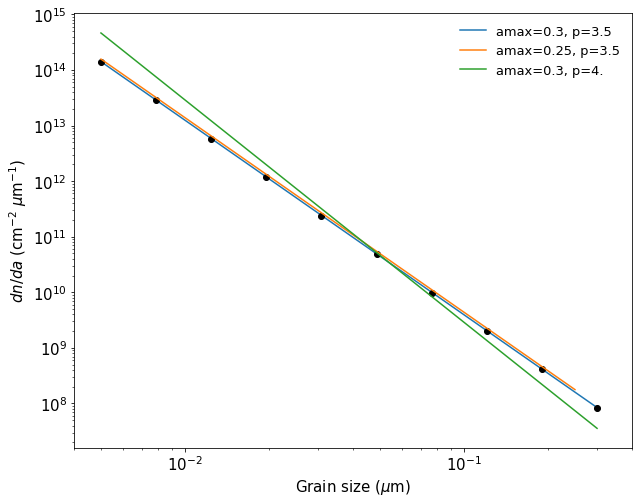

In [7]:
plt.figure( figsize=(10,8) )

plt.plot(MRN77_mod1.a, MRN77_mod1.nd, label='amax=' + str(MRN77_mod1.a[-1]) + ', p=3.5')
plt.plot(MRN77_mod4.a, MRN77_mod4.nd, 'ko', label='')
plt.plot(MRN77_mod2.a, MRN77_mod2.nd, label='amax=' + str(MRN77_mod2.a[-1]) + ', p=3.5')
plt.plot(MRN77_mod3.a, MRN77_mod3.nd, label='amax=' + str(MRN77_mod3.a[-1]) + ', p=4.')

plt.legend(loc='upper right', frameon=False, fontsize=13)
plt.loglog()

plt.tick_params(labelsize=15)
plt.xlabel(r'Grain size ($\mu$m)', size=15)
plt.ylabel(r'$dn/da$ (cm$^{-2}$ $\mu$m$^{-1}$)', size=15)

plt.xlim(0.004, 0.4)
plt.show()

See https://iopscience.iop.org/article/10.1086/318651/pdf, equations 2, 4 and 5 for the details of units

nd = dn/da [cm-2 um-1]

a^4 dn/da [cm-2 um3]

1.e-12 : for converting from um -> cm, so: um3 -> cm3 1.e-12

In [8]:
A = 1.e17 #1.e-12*1.e29

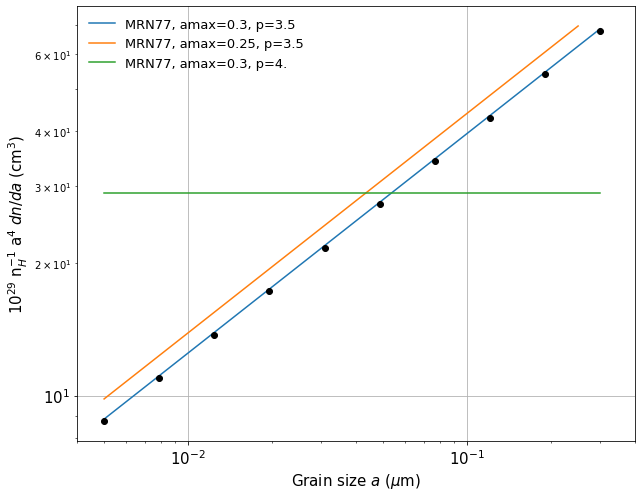

In [9]:
plt.figure( figsize=(10,8) )

plt.plot(MRN77_mod1.a, A*MRN77_mod1.nd*MRN77_mod1.a**4/NH, label='MRN77, amax=' + str(MRN77_mod1.a[-1]) + ', p=3.5')
plt.plot(MRN77_mod4.a, A*MRN77_mod4.nd*MRN77_mod4.a**4/NH, 'ko', label='')
plt.plot(MRN77_mod2.a, A*MRN77_mod2.nd*MRN77_mod2.a**4/NH, label='MRN77, amax=' + str(MRN77_mod2.a[-1]) + ', p=3.5')
plt.plot(MRN77_mod3.a, A*MRN77_mod3.nd*MRN77_mod3.a**4/NH, label='MRN77, amax=' + str(MRN77_mod3.a[-1]) + ', p=4.')
plt.loglog()

plt.xlabel(r'Grain size $a$ ($\mu$m)', size=15)
plt.ylabel(r'10$^{29}$ n$^{-1}_H$ a$^4$ $dn/da$ (cm$^{3}$)', size=15)

plt.tick_params(labelsize=15)

plt.xlim(0.004, 0.4)

plt.legend(loc='upper left', frameon=False, fontsize=13)
plt.grid()
plt.show()

## 5.2 WD01 model for the SMC

In [13]:
# Set up some paramameter for LMC
Rv = 2.87
i  = 28

xlim = [0.0003, 2.]
ylim = [0.01, 100.]

a    = np.logspace(np.log10(0.0001), np.log10(2.), 200)

# WD2001 models, SMC, here bc = [0] x 10^(-5) ONLY
SMC_sil = sizedist.WD01(Rv=Rv, radii=a, graintype='Silicate', bc=0., gal='SMC')
SMC_gra = sizedist.WD01(Rv=Rv, radii=a, graintype='Graphite', bc=0., gal='SMC')

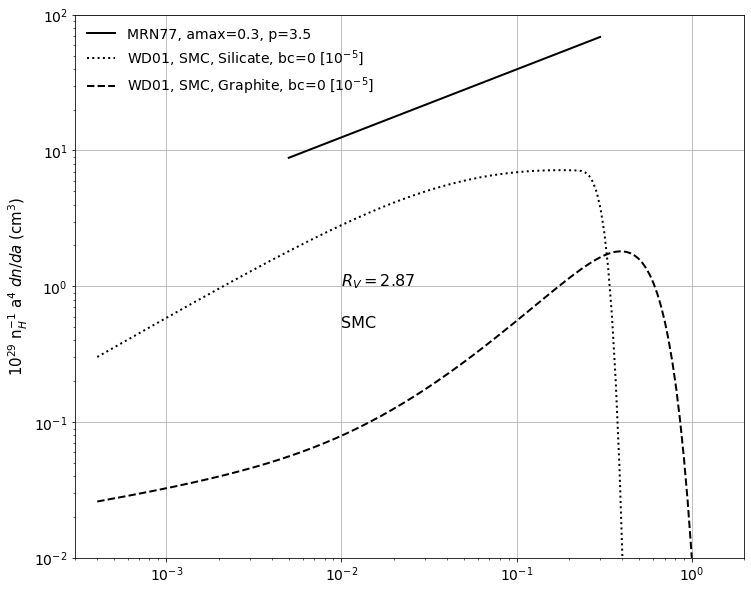

In [14]:
# Two subplots, the axes array is 1-d
f, ax = plt.subplots(1, figsize=(12, 10), sharex=True)
# f.suptitle('Grain-size distributions')

ax.plot(MRN77_mod1.a, A*MRN77_mod1.nd*MRN77_mod1.a**4/NH, 'k-', lw=2, label='MRN77, amax=' + str(MRN77_mod1.a[-1]) + ', p=3.5')

ax.plot(SMC_sil.a[i:], A*SMC_sil.nd[i:]*SMC_sil.a[i:]**4, 'k:', lw=2, label='WD01, SMC, Silicate, bc=0 [$10^{-5}$]')
ax.plot(SMC_gra.a[i:], A*SMC_gra.nd[i:]*SMC_gra.a[i:]**4, 'k--', lw=2, label='WD01, SMC, Graphite, bc=0 [$10^{-5}$]')


ax.text(0.01, 1., r'$R_V = $' + str(Rv), fontsize=16)
ax.text(0.01, 0.5, r'SMC', fontsize=16)

ax.set_ylabel(r'10$^{29}$ n$^{-1}_H$ a$^4$ $dn/da$ (cm$^{3}$)', size=15)

ax.tick_params(labelsize=14)

ax.loglog()
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.legend(loc='upper left', frameon=False, fontsize=14)
ax.grid()

plt.show()

### The total mass column of dust (g cm^-2).

<!-- $$\kappa = \frac{1}{M_d}\ \int \sigma\ \frac{dn}{da}\ da $$ -->

In [12]:
print(r'Graphite dust mass = %.3e [g cm^{-2}]' %(SMC_sil.mass_column()))
print(r'Silicate dust mass = %.3e [g cm^{-2}]' %(SMC_gra.mass_column()))

Graphite dust mass = 3.699e-27 [g cm^{-2}]
Silicate dust mass = 2.888e-28 [g cm^{-2}]
